In [1]:
import numpy as np
import matplotlib.pyplot as plt

from CCfun import load_ccd_file
from CCfun import combine_spectra

In [2]:
%matplotlib inline

plt.rcParams["font.size"] = 15

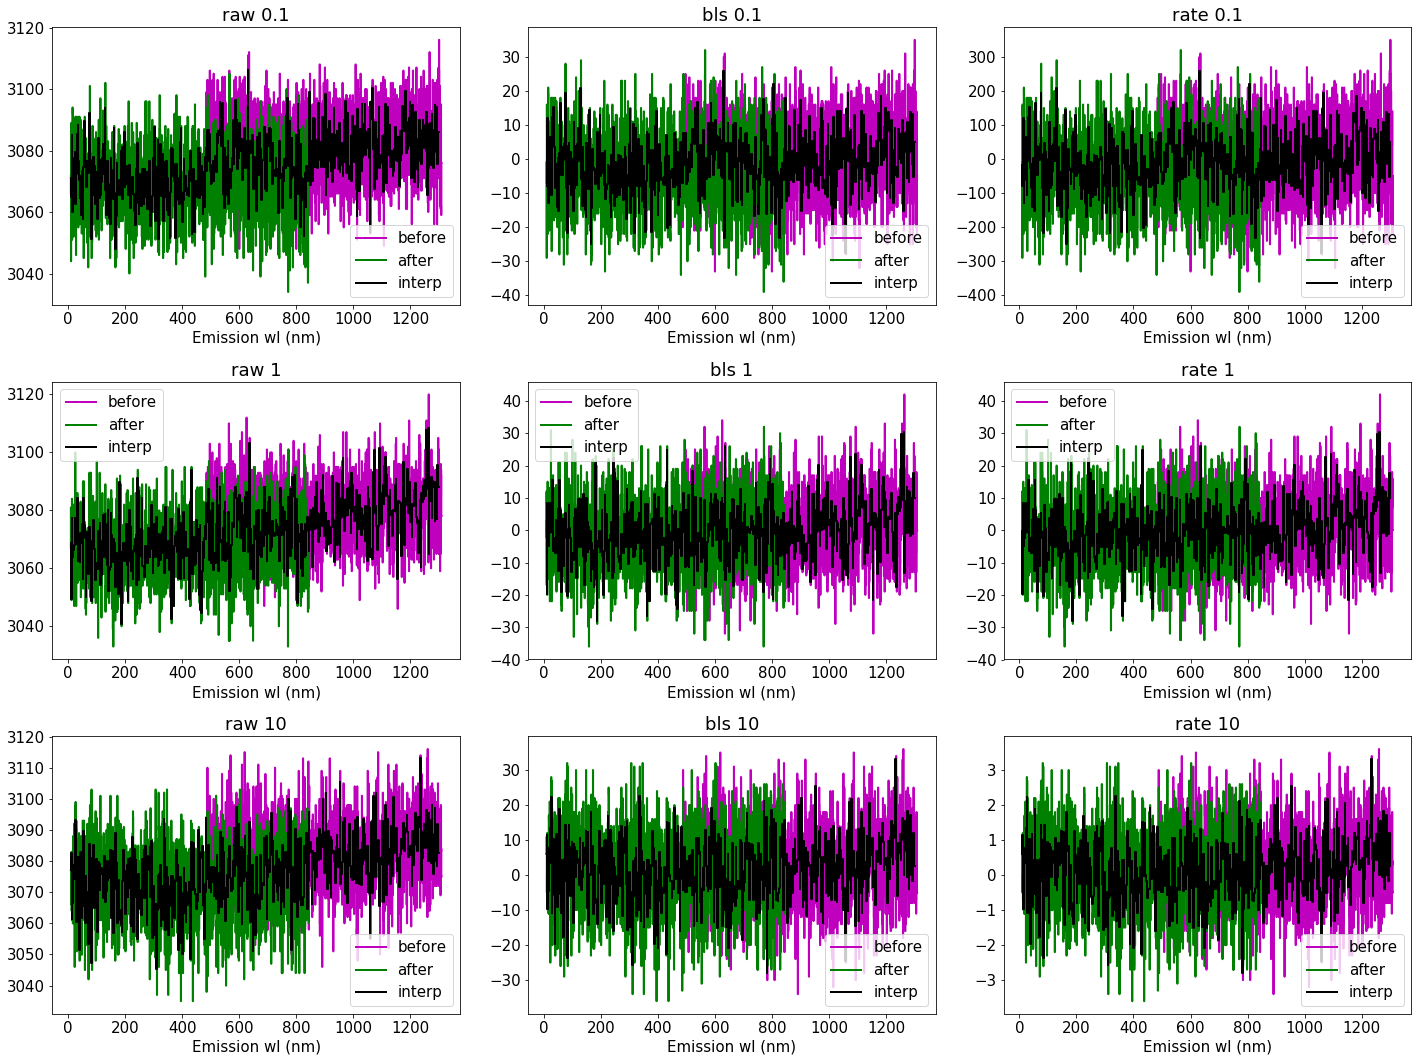

In [5]:
wls = np.linspace(10, 1300, 501)
k   = 0

plt.figure(figsize=(20, 15))

for exposure in (0.1, 1, 10):
    before = load_ccd_file(f"/Users/Gonzalo/github/CCdata/Seattle/pre/Seattle_BaF_pre_2019_04_23_18_08_27_780000/background_before_crystal_11_exposure_{exposure}.asc")
    after  = load_ccd_file(f"/Users/Gonzalo/github/CCdata/Seattle/pre/Seattle_BaF_pre_2019_04_23_18_08_27_780000/background_after_crystal_11_exposure_{exposure}.asc")
    comb   = combine_spectra(before, after)
    
    for attr in "raw bls rate".split():
        k += 1
        plt.subplot(3, 3, k)
        plt.plot(before.em_wl, getattr(before, attr)     , drawstyle="steps", lw=2, color="m", label="before")
        plt.plot( after.em_wl, getattr( after, attr)     , drawstyle="steps", lw=2, color="g", label="after" )
        plt.plot(         wls, getattr(  comb, attr)(wls), drawstyle="steps", lw=2, color="k", label="interp")
        plt.legend()
        plt.xlabel("Emission wl (nm)")
        plt.title (f"{attr} {exposure}")
        
plt.tight_layout()
